In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import StackingClassifier
import pandas as pd
#from mlxtend.classifier import StackingClassifier

In [13]:
data = pd.read_csv("ha.csv")
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']
X = data.drop('target',axis=1)
y = data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
a=DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2)
b=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 17, weights= 'distance')
c=SVC(C= 1000, gamma= 0.0001, kernel= 'rbf')
d=GaussianNB()
e=RandomForestClassifier(max_features='log2', n_estimators= 1000)

In [35]:
mylr =LogisticRegression(C= 1.0, penalty= 'l2', solver= 'newton-cg')

In [36]:
st = StackingClassifier(estimators = [a,b,c,d,e],final_estimator = mylr)

In [37]:
for i,j in zip([a,b,c,d,e,st],['a','b','c','d','e','ST']):
    score = model_selection.cross_val_score(i,X_train,y_train,cv=10,scoring='accuracy')
    print("A= %0.3f [%s]"%(score.mean(),j))

A= 0.858 [a]
A= 0.834 [b]
A= 0.850 [c]
A= 0.834 [d]
A= 0.922 [e]
A= nan [ST]


/home/nisarga/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nisarga/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nisarga/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_stacking.py", line 441, in fit
    return super().fit(X, self._le.transform(y), sample_weight)
  File "/home/nisarga/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_stacking.py", line 139, in fit
    names, all_estimators = self._validate_estimators()
  File "/home/nisarga/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py", line 225, in _validate_estimators
    names, estimators = zip(*self.estimators)
TypeError: 'DecisionTreeClassifier' object is not iter

In [44]:
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
import pandas as pd

In [45]:
data = pd.read_csv("ha.csv")
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']
X = data.drop('target',axis=1)
y = data['target']


In [46]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression(C= 1.0, penalty= 'l2', solver= 'newton-cg')))
	level0.append(('knn', KNeighborsClassifier(metric= 'manhattan', n_neighbors= 17, weights= 'distance')))
	level0.append(('cart', DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2)))
	level0.append(('svm',SVC(C= 1000, gamma= 0.0001, kernel= 'rbf')))
	level0.append(('bayes', GaussianNB()))
	level0.append(('rfa',RandomForestClassifier(max_features='log2', n_estimators= 1000)))
	# define meta learner model
	level1 = LogisticRegression(C= 1.0, penalty= 'l2', solver= 'newton-cg')
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [47]:
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

In [48]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>lr 0.820 (0.031)
>knn 0.699 (0.038)
>cart 0.901 (0.030)
>svm 0.710 (0.036)
>bayes 0.840 (0.029)
>stacking 0.941 (0.017)


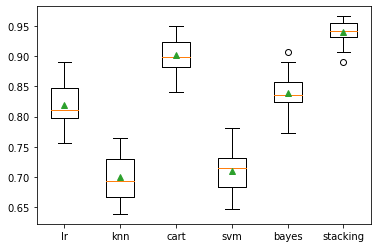

In [49]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [31]:
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X, y)
data = [40,1,2,140,289,0,0,172,0,0.0,1,0]
yhat = model.predict(data)
print('Predicted Class: %d' % (yhat))

NameError: name 'level0' is not defined